In [1]:
!git clone https://github.com/pjreddie/darknet.git
import os
os.chdir("/content/darknet")

Cloning into 'darknet'...
remote: Enumerating objects: 5934, done.
remote: Total 5934 (delta 0), reused 0 (delta 0), pack-reused 5934
Receiving objects: 100% (5934/5934), 6.35 MiB | 13.07 MiB/s, done.
Resolving deltas: 100% (3926/3926), done.


In [2]:
!ls

cfg	  include	LICENSE.gen   LICENSE.mit  python     src
data	  LICENSE	LICENSE.gpl   LICENSE.v1   README.md
examples  LICENSE.fuck	LICENSE.meta  Makefile	   scripts


In [5]:
!sudo apt install libopencv-dev python3-opencv
!sudo apt install cmake

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,477 kB of archives.
After this operation, 13.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 2,477 kB in 2s (1,608 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog bas

In [7]:

!make


gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wa

In [8]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

--2021-05-31 21:19:27--  http://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/yolov1/yolov1.weights [following]
--2021-05-31 21:19:28--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights’

yolov1.weights      100%[===================>] 752.75M  69.2MB/s    in 26s     

2021-05-31 21:19:54 (28.7 MB/s) - ‘yolov1.weights’ saved [789312988/789312988]



!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

In [10]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/data/dog.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

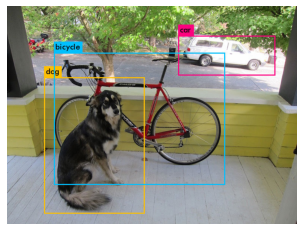

In [17]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)